In [1]:
# =============================================================================
# Activity 5: Confounding Variables Detective
# =============================================================================
# 
# GOAL: Understand how confounding variables create spurious correlations
#       (correlation without causation)
#
# CONCEPTS: Confounding, causation vs. correlation, causal diagrams
#
# THE LESSON: Just because X and Y are correlated doesn't mean X causes Y!
# =============================================================================

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ICE CREAM AND DROWNING EXAMPLE

Correlation between ice cream sales and drownings: 0.839 
Strong positive correlation!

WRONG conclusion: Ice cream causes drowning!
(Or drowning makes people buy ice cream?)



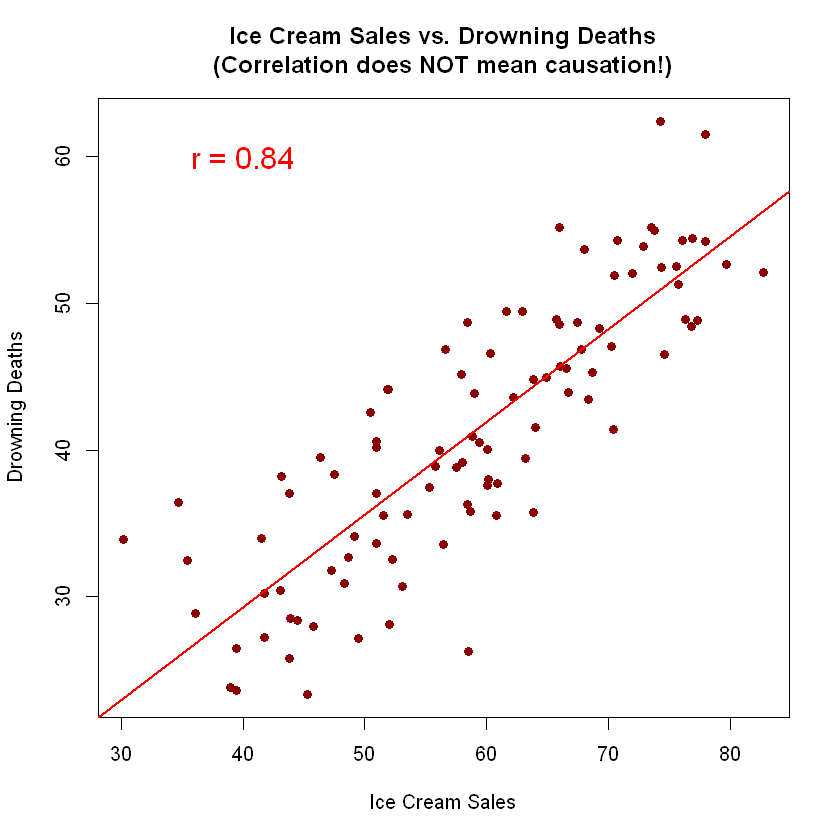

CORRECT explanation:
Temperature <U+2192> Ice cream sales (people buy more when hot)
Temperature <U+2192> Drownings (more swimming when hot)
Ice cream does NOT cause drowning!



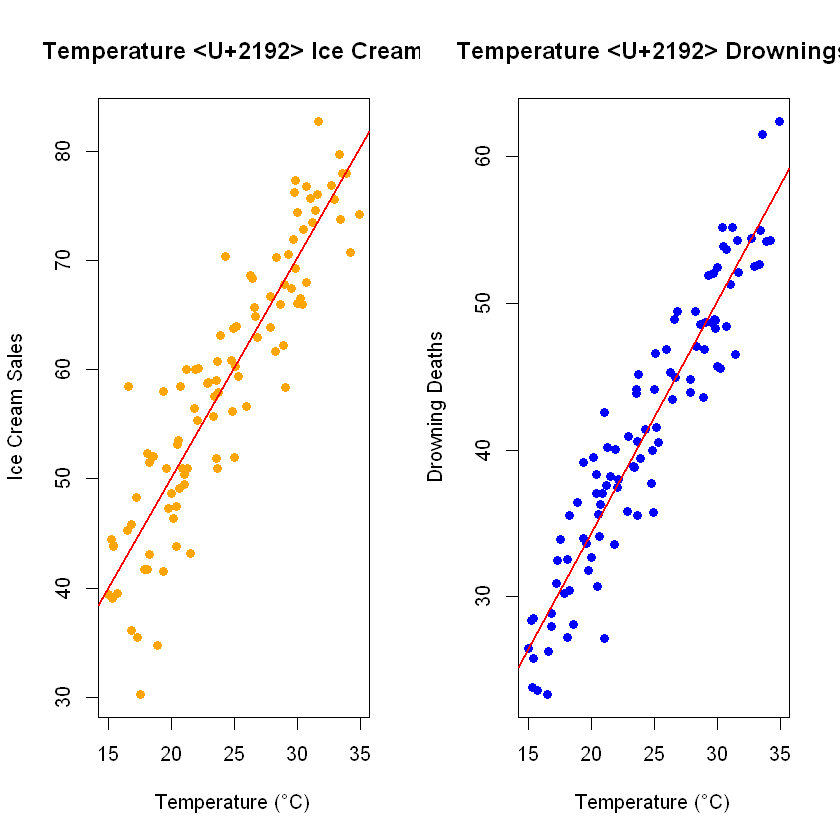

In [2]:
# -----------------------------------------------------------------------------
# PART 1: The Classic Example - Ice Cream and Drowning
# -----------------------------------------------------------------------------

set.seed(789)
n <- 100

# The CONFOUNDER: temperature
# (This is what actually drives both variables)
temperature <- runif(n, min = 15, max = 35)  # Temperature in Celsius

# Ice cream sales INCREASE with temperature
ice_cream_sales <- 10 + 2 * temperature + rnorm(n, sd = 5)

# Drowning deaths also INCREASE with temperature
# (More people swim when it's hot)
drownings <- 5 + 1.5 * temperature + rnorm(n, sd = 3)

# Look at the correlation between ice cream and drowning
correlation <- cor(ice_cream_sales, drownings)

cat("=================================================================\n")
cat("ICE CREAM AND DROWNING EXAMPLE\n")
cat("=================================================================\n\n")
cat("Correlation between ice cream sales and drownings:", 
    round(correlation, 3), "\n")
cat("Strong positive correlation!\n\n")

# Plot the misleading relationship
plot(ice_cream_sales, drownings, 
     pch = 16, col = "darkred",
     xlab = "Ice Cream Sales",
     ylab = "Drowning Deaths",
     main = "Ice Cream Sales vs. Drowning Deaths\n(Correlation does NOT mean causation!)")
abline(lm(drownings ~ ice_cream_sales), col = "red", lwd = 2)
text(40, 60, paste("r =", round(correlation, 2)), col = "red", cex = 1.5)

cat("WRONG conclusion: Ice cream causes drowning!\n")
cat("(Or drowning makes people buy ice cream?)\n\n")

# Now reveal the confounder
par(mfrow = c(1, 2))

plot(temperature, ice_cream_sales, 
     pch = 16, col = "orange",
     xlab = "Temperature (°C)",
     ylab = "Ice Cream Sales",
     main = "Temperature → Ice Cream")
abline(lm(ice_cream_sales ~ temperature), col = "red", lwd = 2)

plot(temperature, drownings, 
     pch = 16, col = "blue",
     xlab = "Temperature (°C)",
     ylab = "Drowning Deaths",
     main = "Temperature → Drownings")
abline(lm(drownings ~ temperature), col = "red", lwd = 2)

par(mfrow = c(1, 1))

cat("CORRECT explanation:\n")
cat("Temperature → Ice cream sales (people buy more when hot)\n")
cat("Temperature → Drownings (more swimming when hot)\n")
cat("Ice cream does NOT cause drowning!\n\n")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


EXERCISE AND HEALTH EXAMPLE

Correlation between exercise and health: 0.485 

NAIVE conclusion: Exercise causes better health
(Might be partially true, but is it the whole story?)



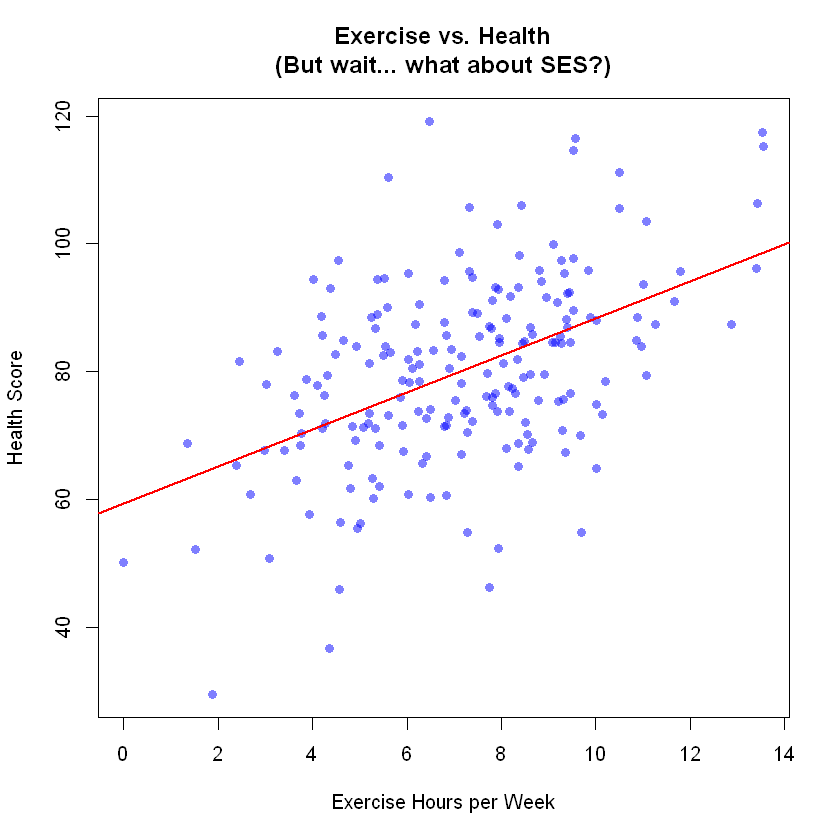

BETTER conclusion: SES is a confounder!
High SES <U+2192> More exercise
High SES <U+2192> Better health (better food, healthcare, etc.)
True causal effect of exercise might be smaller than it appears!



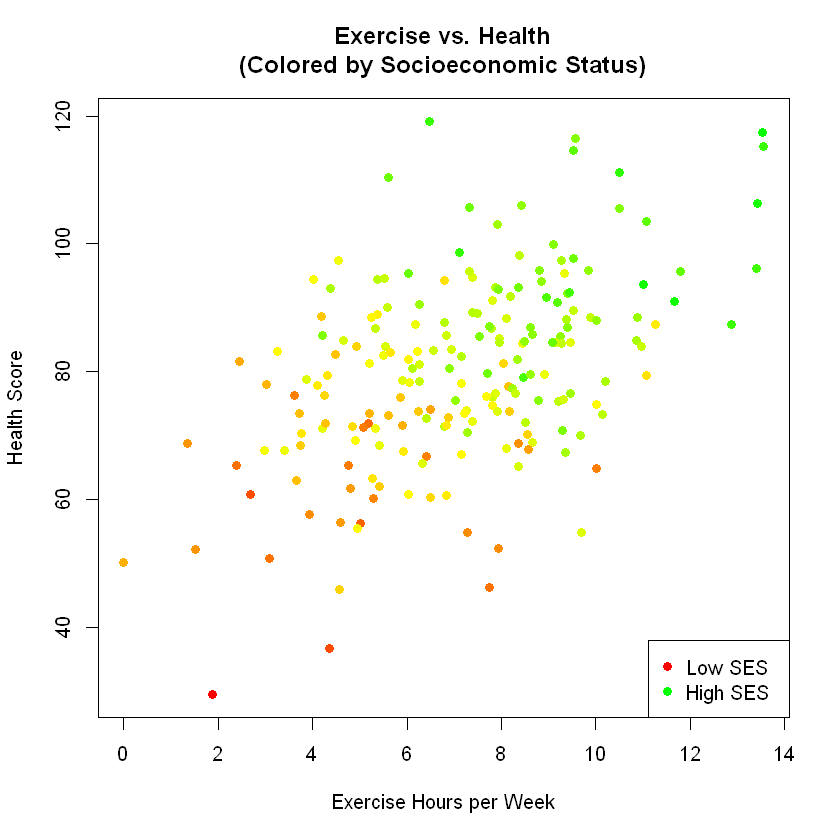

In [3]:
# -----------------------------------------------------------------------------
# PART 2: Biology Example - Exercise and Health
# -----------------------------------------------------------------------------

# Observational study: people who exercise more are healthier
# But is exercise causing health, or is there a confounder?

n <- 200

# The CONFOUNDER: socioeconomic status (SES)
# Higher SES → more resources for both exercise and health
ses <- rnorm(n, mean = 50, sd = 15)

# Exercise increases with SES (gym memberships, free time)
exercise_hours <- 2 + 0.1 * ses + rnorm(n, sd = 2)
exercise_hours[exercise_hours < 0] <- 0  # Can't be negative

# Health score increases with SES (better diet, healthcare, less stress)
health_score <- 40 + 0.8 * ses + rnorm(n, sd = 10)

cat("\n=================================================================\n")
cat("EXERCISE AND HEALTH EXAMPLE\n")
cat("=================================================================\n\n")

# The misleading correlation
correlation <- cor(exercise_hours, health_score)
cat("Correlation between exercise and health:", round(correlation, 3), "\n\n")

plot(exercise_hours, health_score, 
     pch = 16, col = rgb(0, 0, 1, 0.5),
     xlab = "Exercise Hours per Week",
     ylab = "Health Score",
     main = "Exercise vs. Health\n(But wait... what about SES?)")
abline(lm(health_score ~ exercise_hours), col = "red", lwd = 2)

cat("NAIVE conclusion: Exercise causes better health\n")
cat("(Might be partially true, but is it the whole story?)\n\n")

# Show the confounder
# Color points by SES level
colors <- colorRampPalette(c("red", "yellow", "green"))(100)
ses_scaled <- as.integer(cut(ses, breaks = 100))

plot(exercise_hours, health_score, 
     pch = 16, col = colors[ses_scaled],
     xlab = "Exercise Hours per Week",
     ylab = "Health Score",
     main = "Exercise vs. Health\n(Colored by Socioeconomic Status)")
legend("bottomright", 
       legend = c("Low SES", "High SES"), 
       col = c("red", "green"), 
       pch = 16)

cat("BETTER conclusion: SES is a confounder!\n")
cat("High SES → More exercise\n")
cat("High SES → Better health (better food, healthcare, etc.)\n")
cat("True causal effect of exercise might be smaller than it appears!\n\n")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


REVERSE CAUSATION EXAMPLE

Average hospital visits:
  Died: 12.9 
  Survived: 5 

WRONG conclusion: Hospitals cause death!
CORRECT: Illness causes both hospital visits AND death
(In fact, hospitals probably PREVENT many deaths)



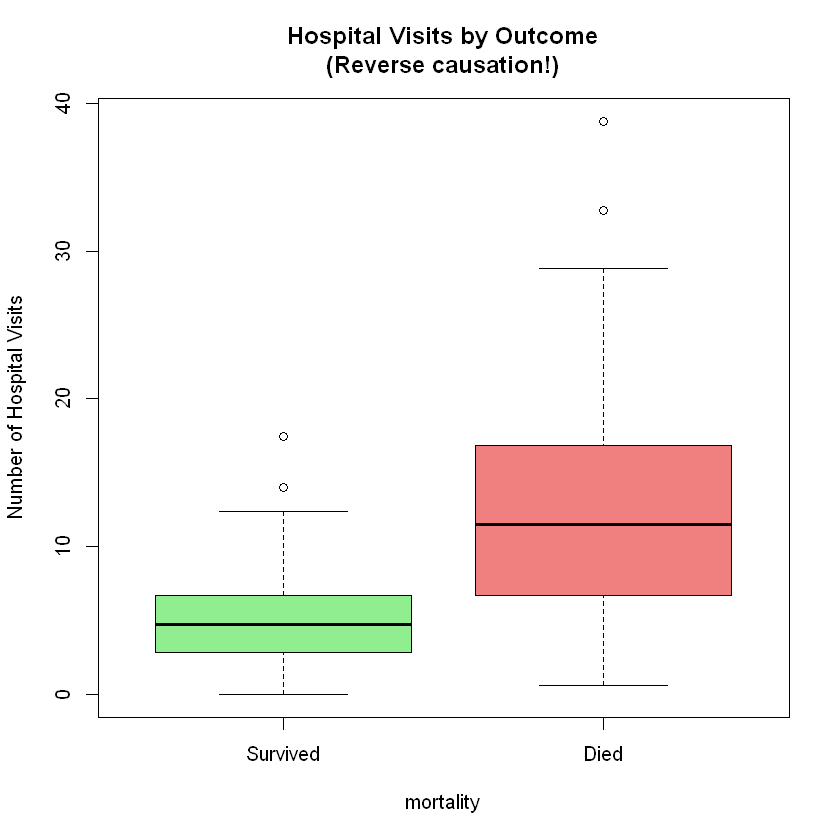

In [4]:
# -----------------------------------------------------------------------------
# PART 3: The Direction Matters - Reverse Causation
# -----------------------------------------------------------------------------

# Example: Hospital visits and mortality
# More hospital visits correlate with more deaths
# Does this mean hospitals kill people?!

n <- 150

# The TRUE causal direction: Illness → hospital visits
illness_severity <- rexp(n, rate = 0.5)

# Sicker people visit hospital more
hospital_visits <- 2 + 3 * illness_severity + rnorm(n, sd = 2)
hospital_visits <- pmax(hospital_visits, 0)  # Can't be negative

# Sicker people more likely to die
mortality <- rbinom(n, size = 1, prob = plogis(illness_severity - 2))

cat("\n=================================================================\n")
cat("REVERSE CAUSATION EXAMPLE\n")
cat("=================================================================\n\n")

# Among those who died, how many hospital visits?
visits_died <- mean(hospital_visits[mortality == 1])
visits_survived <- mean(hospital_visits[mortality == 0])

cat("Average hospital visits:\n")
cat("  Died:", round(visits_died, 1), "\n")
cat("  Survived:", round(visits_survived, 1), "\n\n")

cat("WRONG conclusion: Hospitals cause death!\n")
cat("CORRECT: Illness causes both hospital visits AND death\n")
cat("(In fact, hospitals probably PREVENT many deaths)\n\n")

boxplot(hospital_visits ~ mortality,
        names = c("Survived", "Died"),
        col = c("lightgreen", "lightcoral"),
        main = "Hospital Visits by Outcome\n(Reverse causation!)",
        ylab = "Number of Hospital Visits")

In [5]:
# -----------------------------------------------------------------------------
# PART 4: YOUR TURN - Generate Your Own Confounded Data
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("YOUR TURN: Create a confounded relationship!\n")
cat("=================================================================\n\n")

# TODO: Create your own example where:
# 1. A confounder Z affects both X and Y
# 2. X and Y are correlated
# 3. But X does NOT cause Y

# Example template:
# confounder <- rnorm(100, mean = 50, sd = 10)
# variable_x <- 10 + 0.5 * confounder + rnorm(100, sd = 3)
# variable_y <- 20 + 0.8 * confounder + rnorm(100, sd = 5)
# 
# cor(variable_x, variable_y)  # Will be correlated!
# plot(variable_x, variable_y)

# Ideas for biology:
# - Temperature → enzyme activity AND bacterial growth
# - Age → medication use AND disease risk
# - Body size → metabolic rate AND longevity
# - Nutrient availability → growth rate AND reproduction

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


YOUR TURN: Create a confounded relationship!



In [6]:
# -----------------------------------------------------------------------------
# PART 5: Drawing Causal Diagrams
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("CAUSAL DIAGRAMS (Draw these on paper!)\n")
cat("=================================================================\n\n")

cat("Scenario 1: Direct causation\n")
cat("    X → Y\n")
cat("Example: Drug dose → Enzyme activity\n\n")

cat("Scenario 2: Confounding\n")
cat("         Z\n")
cat("        ↙ ↘\n")
cat("       X   Y\n")
cat("Example: Temperature → Ice cream & Drowning\n\n")

cat("Scenario 3: Reverse causation\n")
cat("    Y → X\n")
cat("Example: Disease → Hospital visits (not the reverse!)\n\n")

cat("Scenario 4: Mediation (causal chain)\n")
cat("    X → M → Y\n")
cat("Example: Exercise → Weight loss → Blood pressure\n\n")

cat("TODO: For each of the following pairs, draw the causal diagram:\n")
cat("1. Smoking and lung cancer\n")
cat("2. Education level and income\n")
cat("3. Study time and exam grades\n")
cat("4. Coffee consumption and heart disease\n")
cat("5. Gene expression and protein level\n\n")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


CAUSAL DIAGRAMS (Draw these on paper!)

Scenario 1: Direct causation
    X <U+2192> Y
Example: Drug dose <U+2192> Enzyme activity

Scenario 2: Confounding
         Z
        <U+2199> <U+2198>
       X   Y
Example: Temperature <U+2192> Ice cream & Drowning

Scenario 3: Reverse causation
    Y <U+2192> X
Example: Disease <U+2192> Hospital visits (not the reverse!)

Scenario 4: Mediation (causal chain)
    X <U+2192> M <U+2192> Y
Example: Exercise <U+2192> Weight loss <U+2192> Blood pressure

TODO: For each of the following pairs, draw the causal diagram:
1. Smoking and lung cancer
2. Education level and income
3. Study time and exam grades
4. Coffee consumption and heart disease
5. Gene expression and protein level



In [7]:
# -----------------------------------------------------------------------------
# PART 6: How to Establish Causation
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("HOW DO WE ESTABLISH CAUSATION?\n")
cat("=================================================================\n\n")

cat("1. RANDOMIZED CONTROLLED TRIALS\n")
cat("   - Randomly assign treatment (breaks confounding!)\n")
cat("   - Gold standard, but not always ethical/feasible\n\n")

cat("2. STATISTICAL CONTROL\n")
cat("   - Measure confounders and adjust for them\n")
cat("   - Only works if you measured ALL confounders (big assumption!)\n\n")

cat("3. TEMPORAL ORDERING\n")
cat("   - Cause must come before effect\n")
cat("   - Rules out reverse causation\n\n")

cat("4. DOSE-RESPONSE\n")
cat("   - More cause → more effect\n")
cat("   - Strengthens causal inference\n\n")

cat("5. MECHANISM\n")
cat("   - Understand HOW X causes Y\n")
cat("   - Manipulate mediators\n\n")

cat("6. CONSISTENCY ACROSS STUDIES\n")
cat("   - Same result in different populations, designs\n")
cat("   - Reduces likelihood of confounding\n\n")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


HOW DO WE ESTABLISH CAUSATION?

1. RANDOMIZED CONTROLLED TRIALS
   - Randomly assign treatment (breaks confounding!)
   - Gold standard, but not always ethical/feasible

2. STATISTICAL CONTROL
   - Measure confounders and adjust for them
   - Only works if you measured ALL confounders (big assumption!)

3. TEMPORAL ORDERING
   - Cause must come before effect
   - Rules out reverse causation

4. DOSE-RESPONSE
   - More cause <U+2192> more effect
   - Strengthens causal inference

5. MECHANISM
   - Understand HOW X causes Y
   - Manipulate mediators

6. CONSISTENCY ACROSS STUDIES
   - Same result in different populations, designs
   - Reduces likelihood of confounding




CHALLENGE: Find the hidden confounder!

You observe: Gene expression correlates with disease risk
Correlation: 0.342 

QUESTION: Does the gene CAUSE disease?
Or is there a hidden confounder?

Possible confounders in real biology:
- Age (affects both gene expression and disease risk)
- Cell type composition (different cells express genes differently)
- Batch effects (technical artifacts in measurement)
- Environmental factors (stress, diet, etc.)

HOW TO INVESTIGATE:
1. Measure potential confounders
2. Check if they correlate with both variables
3. Adjust for them in analysis
4. Use experimental manipulation (knockout gene, see what happens)



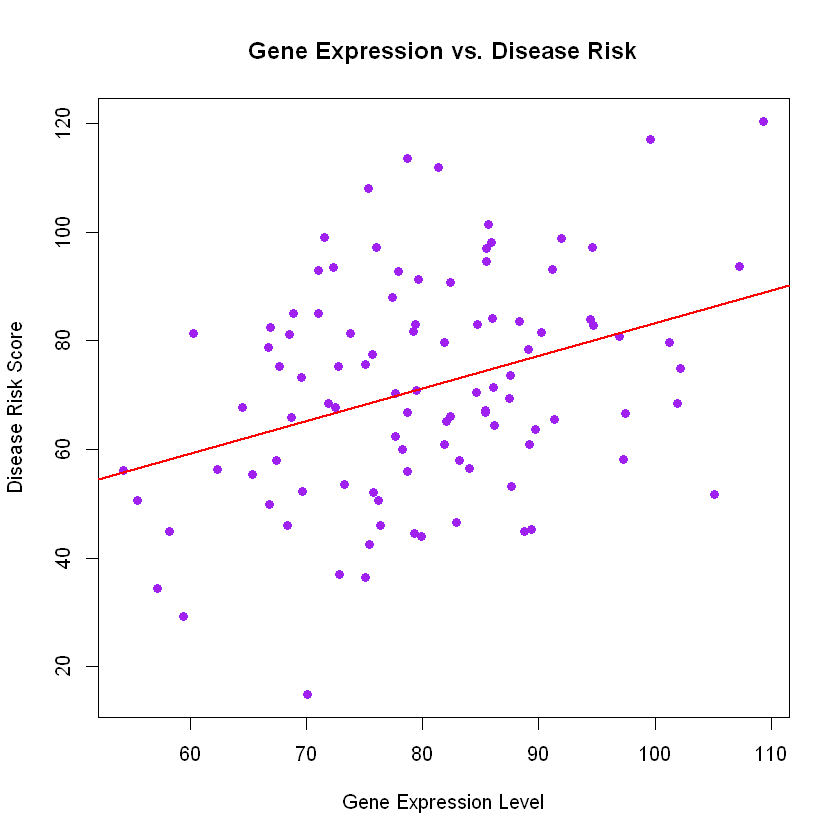

In [8]:
# -----------------------------------------------------------------------------
# PART 7: A Challenge - Can You Spot the Confounder?
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("CHALLENGE: Find the hidden confounder!\n")
cat("=================================================================\n\n")

# Generate data with a hidden confounder
n <- 100
hidden_confounder <- rnorm(n, mean = 100, sd = 20)
gene_expression <- 50 + 0.3 * hidden_confounder + rnorm(n, sd = 10)
disease_risk <- 20 + 0.5 * hidden_confounder + rnorm(n, sd = 15)

plot(gene_expression, disease_risk,
     pch = 16, col = "purple",
     xlab = "Gene Expression Level",
     ylab = "Disease Risk Score",
     main = "Gene Expression vs. Disease Risk")
abline(lm(disease_risk ~ gene_expression), col = "red", lwd = 2)

cat("You observe: Gene expression correlates with disease risk\n")
cat("Correlation:", round(cor(gene_expression, disease_risk), 3), "\n\n")

cat("QUESTION: Does the gene CAUSE disease?\n")
cat("Or is there a hidden confounder?\n\n")

cat("Possible confounders in real biology:\n")
cat("- Age (affects both gene expression and disease risk)\n")
cat("- Cell type composition (different cells express genes differently)\n")
cat("- Batch effects (technical artifacts in measurement)\n")
cat("- Environmental factors (stress, diet, etc.)\n\n")

cat("HOW TO INVESTIGATE:\n")
cat("1. Measure potential confounders\n")
cat("2. Check if they correlate with both variables\n")
cat("3. Adjust for them in analysis\n")
cat("4. Use experimental manipulation (knockout gene, see what happens)\n\n")

## DISCUSSION QUESTIONS


 1. Why is confounding such a big problem in observational studies?

 2. Can you think of a biological example where you thought X caused Y,
    but actually there was a confounder?

 3. In the exercise-health example, even after accounting for SES,
    exercise might still have a causal effect. How would you test this?

 4. Is it EVER possible to prove causation from observational data alone?
    What would you need?

 5. Why are randomized controlled trials considered the "gold standard"
    for establishing causation?

 6. In genetics, we often use Mendelian randomization to infer causation.
    Can you think of why random genetic variants help with confounding?

